# Difference between builds

*This notebook explores the differences between the three builds*

Recall that each build contains eight 'anchors', i.e. specimen **not** included in the main study. These anchors are specimen rotated -90 degrees about the x-axis. All builds contain 45 defined positions in a 3x3x5 grid as displayed in the figure below. The anchors are found at **(2,3,z)** for all layers, and at **(3,1,z)** for layers 1, 3 and 5. This notebook explores the differences between the three builds by comparing these anchor specimen between the builds.

<img src="figs/layout_positions.png" width="600"/>

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

import my_functions as func
import my_plot as myplt

In [4]:
"""
Retrieve all the data and sort it into a dictionary where each entry is a separate characteristic.

Key:   Name of the characteristic.
Value: DataFrame containing the measured values and the layout data.

"""

# Initiate a dictionary with characteristics and layout information
char_dict = func.make_char_dict()

---

## Cylindricity

---

In [40]:
## Prepare data
# List of characteristics
chars = ['Cylindricity_Cyl_4mm_Pos',\
        'Cylindricity_Cyl_8mm_Neg',\
        'Cylindricity_Cyl_8mm_Pos',\
        'Cylindricity_Cyl_16mm-Neg',\
        'Cylindricity_Cyl_16mm_Pos',\
        'Cylindricity_Cyl_24mm_Neg',\
        'Cylindricity_Cyl_24mm_Pos']

for i in range(len(chars)):
    char_dict[chars[i]].insert(2, 'char', chars[i])


# Retrieve the characteristics from the dictionary
df = pd.concat(char_dict[chars[i]] for i in range(len(chars)))

print(df.size)

df.head()

10395


,error,build,char,part_index,x_pos,y_pos,z_pos,angle,center_x,center_y,center_z
part_name,,,,,,,,,,,
Leirmo_Exp1_Build1_#1,0.091050,1,Cylindricity_Cyl_4mm_Pos,1,1,1,1,70,70,70,50.88
Leirmo_Exp1_Build1_#10,0.103505,1,Cylindricity_Cyl_4mm_Pos,10,1,1,2,20,70,70,150.60
Leirmo_Exp1_Build1_#11,0.078500,1,Cylindricity_Cyl_4mm_Pos,11,2,1,2,15,170,70,150.60
Leirmo_Exp1_Build1_#12,0.075298,1,Cylindricity_Cyl_4mm_Pos,12,3,1,2,55,270,70,150.60
Leirmo_Exp1_Build1_#13,0.103748,1,Cylindricity_Cyl_4mm_Pos,13,1,2,2,135,70,170,150.60


In [41]:
# Isolate anchors

df1 = df[(df['x_pos'] == 2) & (df['y_pos'] == 3)]

print(df1.size)

df1.head()

1155


,error,build,char,part_index,x_pos,y_pos,z_pos,angle,center_x,center_y,center_z
part_name,,,,,,,,,,,
Leirmo_Exp1_Build1_#17,0.139702,1,Cylindricity_Cyl_4mm_Pos,17,2,3,2,-90,170,270,150.60
Leirmo_Exp1_Build1_#26,0.161236,1,Cylindricity_Cyl_4mm_Pos,26,2,3,3,-90,170,270,250.32
Leirmo_Exp1_Build1_#35,0.157326,1,Cylindricity_Cyl_4mm_Pos,35,2,3,4,-90,170,270,350.04
Leirmo_Exp1_Build1_#44,0.154594,1,Cylindricity_Cyl_4mm_Pos,44,2,3,5,-90,170,270,449.76
Leirmo_Exp1_Build1_#8,0.143345,1,Cylindricity_Cyl_4mm_Pos,8,2,3,1,-90,170,270,50.88


In [89]:
# Remove redundant columns (unnecessary for final implementation)

df2 = df1.reset_index()[['char', 'build', 'z_pos', 'error']]

print(df2.size)

df2.head()

420


,char,build,z_pos,error
0,Cylindricity_Cyl_4mm_Pos,1,2,0.139702
1,Cylindricity_Cyl_4mm_Pos,1,3,0.161236
2,Cylindricity_Cyl_4mm_Pos,1,4,0.157326
3,Cylindricity_Cyl_4mm_Pos,1,5,0.154594
4,Cylindricity_Cyl_4mm_Pos,1,1,0.143345


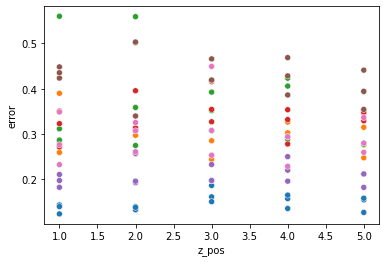

In [90]:
sns.scatterplot(data=df2, x='z_pos', y='error', hue='char', legend=False)

plt.show()

In [92]:
builds = [(df2[df2['build'] == i]) for i in range(1,4)]

for i in range(3):
    print(builds[i].head())

                       char  build  z_pos     error
0  Cylindricity_Cyl_4mm_Pos      1      2  0.139702
1  Cylindricity_Cyl_4mm_Pos      1      3  0.161236
2  Cylindricity_Cyl_4mm_Pos      1      4  0.157326
3  Cylindricity_Cyl_4mm_Pos      1      5  0.154594
4  Cylindricity_Cyl_4mm_Pos      1      1  0.143345
                       char  build  z_pos     error
5  Cylindricity_Cyl_4mm_Pos      2      2  0.132615
6  Cylindricity_Cyl_4mm_Pos      2      3  0.186327
7  Cylindricity_Cyl_4mm_Pos      2      4  0.135503
8  Cylindricity_Cyl_4mm_Pos      2      5  0.126883
9  Cylindricity_Cyl_4mm_Pos      2      1  0.139695
                        char  build  z_pos     error
10  Cylindricity_Cyl_4mm_Pos      3      2  0.138130
11  Cylindricity_Cyl_4mm_Pos      3      3  0.150569
12  Cylindricity_Cyl_4mm_Pos      3      4  0.165138
13  Cylindricity_Cyl_4mm_Pos      3      5  0.158322
14  Cylindricity_Cyl_4mm_Pos      3      1  0.123571


In [100]:
gb = df2.groupby(['build', 'char'])

In [101]:
gb.head()

,char,build,z_pos,error
0,Cylindricity_Cyl_4mm_Pos,1,2,0.139702
1,Cylindricity_Cyl_4mm_Pos,1,3,0.161236
2,Cylindricity_Cyl_4mm_Pos,1,4,0.157326
3,Cylindricity_Cyl_4mm_Pos,1,5,0.154594
4,Cylindricity_Cyl_4mm_Pos,1,1,0.143345
5,Cylindricity_Cyl_4mm_Pos,2,2,0.132615
6,Cylindricity_Cyl_4mm_Pos,2,3,0.186327
7,Cylindricity_Cyl_4mm_Pos,2,4,0.135503
8,Cylindricity_Cyl_4mm_Pos,2,5,0.126883
9,Cylindricity_Cyl_4mm_Pos,2,1,0.139695


In [102]:
gb.mean()

z_pos     error
build char                                      
1     Cylindricity_Cyl_16mm-Neg      3  0.345713
      Cylindricity_Cyl_16mm_Pos      3  0.203716
      Cylindricity_Cyl_24mm_Neg      3  0.464969
      Cylindricity_Cyl_24mm_Pos      3  0.335352
      Cylindricity_Cyl_4mm_Pos       3  0.151240
      Cylindricity_Cyl_8mm_Neg       3  0.309177
      Cylindricity_Cyl_8mm_Pos       3  0.425402
2     Cylindricity_Cyl_16mm-Neg      3  0.355540
      Cylindricity_Cyl_16mm_Pos      3  0.207474
      Cylindricity_Cyl_24mm_Neg      3  0.425055
      Cylindricity_Cyl_24mm_Pos      3  0.295439
      Cylindricity_Cyl_4mm_Pos       3  0.144205
      Cylindricity_Cyl_8mm_Neg       3  0.290763
      Cylindricity_Cyl_8mm_Pos       3  0.327091
3     Cylindricity_Cyl_16mm-Neg      3  0.307524
      Cylindricity_Cyl_16mm_Pos      3  0.215698
      Cylindricity_Cyl_24mm_Neg      3  0.395293
      Cylindricity_Cyl_24mm_Pos      3  0.259737
      Cylindricity_Cyl_4mm_Pos       3  0.147146
      Cylindricity_Cyl_8mm_Neg       3  0.267476
      Cylindricity_Cyl_8mm_Pos       3  0.355942

In [103]:
gb.std()

z_pos     error
build char                                         
1     Cylindricity_Cyl_16mm-Neg  1.581139  0.042519
      Cylindricity_Cyl_16mm_Pos  1.581139  0.011678
      Cylindricity_Cyl_24mm_Neg  1.581139  0.023457
      Cylindricity_Cyl_24mm_Pos  1.581139  0.071944
      Cylindricity_Cyl_4mm_Pos   1.581139  0.009269
      Cylindricity_Cyl_8mm_Neg   1.581139  0.053239
      Cylindricity_Cyl_8mm_Pos   1.581139  0.133917
2     Cylindricity_Cyl_16mm-Neg  1.581139  0.023888
      Cylindricity_Cyl_16mm_Pos  1.581139  0.025983
      Cylindricity_Cyl_24mm_Neg  1.581139  0.046381
      Cylindricity_Cyl_24mm_Pos  1.581139  0.038489
      Cylindricity_Cyl_4mm_Pos   1.581139  0.024004
      Cylindricity_Cyl_8mm_Neg   1.581139  0.024985
      Cylindricity_Cyl_8mm_Pos   1.581139  0.060306
3     Cylindricity_Cyl_16mm-Neg  1.581139  0.032514
      Cylindricity_Cyl_16mm_Pos  1.581139  0.029808
      Cylindricity_Cyl_24mm_Neg  1.581139  0.044803
      Cylindricity_Cyl_24mm_Pos  1.581139  0.020582
      Cylindricity_Cyl_4mm_Pos   1.581139  0.016564
      Cylindricity_Cyl_8mm_Neg   1.581139  0.022691
      Cylindricity_Cyl_8mm_Pos   1.581139  0.033537

In [106]:
sns.scatterplot(data=gb, x='z_pos', y='error')

NameError: name 'z_pos' is not defined